In [ ]:
#pip install imblearn
#pip install mlxtend

In [28]:
from feature_module import Features
from load_dataset_module import LoadDataset
from models import Models
from preprocessing import Preprocessing

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
from  sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier

## Read Data

In [36]:
file_path = 'activity_context_tracking_data.csv'
load_Data = LoadDataset()
data_df = load_Data.load_data(file_path)
data_df.head() #returns the n numbers of rows 

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.68151,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.68151,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.68151,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting


In [37]:
data_df.describe() #Generates descriptive statistics

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel
count,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000
mean,102760.500000,189.455094,2.726547,0.414120,-0.017598,-0.011672,0.038061,0.095601,-0.973535,9.644523,0.102566,-0.977011,9.650622,0.548546,-9.644151,-29.450924,5842.296297,53.946546
std,59328.657999,80.359907,22.446067,12.438395,0.148930,0.113509,0.791781,1.948063,2.484468,2.638467,1.818980,2.335549,2.106011,20.807783,20.344238,17.340151,4521.725944,8.100255
min,1.000000,0.000000,-178.000000,-86.000000,-0.712191,-0.556955,-0.999912,-19.536700,-14.480100,-5.975930,-13.657700,-7.986420,-3.828100,-139.200000,-70.000000,-107.200000,0.000000,-26.570000
25%,51380.750000,139.000000,-3.000000,-3.000000,-0.094141,-0.100048,-0.874552,-0.497994,-3.485960,8.887280,-0.457989,-3.217810,9.417110,-15.200000,-26.000000,-41.200000,1000.000000,51.350000
50%,102760.500000,186.000000,6.000000,-1.000000,-0.027313,-0.011470,0.491602,0.076615,-1.072600,10.381300,0.076614,-1.034300,10.327500,5.600000,-7.600000,-32.400000,5000.000000,54.850000
75%,154140.250000,268.000000,18.000000,3.000000,0.018465,0.050689,0.789546,0.497994,0.612916,10.649400,0.383102,0.446432,10.649400,15.600000,6.000000,-14.000000,10000.000000,57.940000
max,205520.000000,359.000000,169.000000,88.000000,0.804160,0.723168,0.999904,15.859200,19.575000,19.575000,13.658400,9.895530,14.492300,78.800000,158.400000,77.200000,15000.000000,70.620000


In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205520 entries, 0 to 205519
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         205520 non-null  int64  
 1   orX         205520 non-null  int64  
 2   orY         205520 non-null  int64  
 3   orZ         205520 non-null  int64  
 4   rX          205520 non-null  float64
 5   rY          205520 non-null  float64
 6   rZ          205520 non-null  float64
 7   accX        205520 non-null  float64
 8   accY        205520 non-null  float64
 9   accZ        205520 non-null  float64
 10  gX          205520 non-null  float64
 11  gY          205520 non-null  float64
 12  gZ          205520 non-null  float64
 13  mX          205520 non-null  float64
 14  mY          205520 non-null  float64
 15  mZ          205520 non-null  float64
 16  lux         205520 non-null  int64  
 17  soundLevel  205520 non-null  float64
 18  activity    205520 non-null  object 
dtypes:

## Preprocessing

In [39]:
data_df.drop('_id', axis=1, inplace=True) #drops specified

X = data_df.drop('activity', axis=1)
y = data_df['activity']

In [34]:
y.value_counts() #counts of unique rows

Sitting               75733
Walking               64507
Lying                 25440
Standing              19920
ClimbingUpStairs       5520
Jogging                5160
ClimbingDownStairs     3720
AscendingStairs        1800
Running                1200
MountainDescending      840
Driving                 840
DescendingStairs        720
MountainAscending       120
Name: activity, dtype: int64

### Data Segmentation

In [40]:
preprocessing = Preprocessing()

In [41]:
segments, segments_label = preprocessing.segment_data(X, y, window_size=90, overlap=0.5)
print(segments.shape, segments_label.shape)

Done
(4566, 90, 17) (4566,)


In [42]:
#Extract features from each segment and replace each segment with the extracted features
X_segmented = np.array([])
for index in range(len(segments)):
    segment = LoadDataset().get_features(pd.DataFrame(segments[index]))
    #segment = np.array([list(segment[k]) for k in segment]).T
    X_segmented = np.vstack([X_segmented, segment]) if X_segmented.size else segment

In [43]:
y_segmented = segments_label

In [44]:
print(X_segmented.shape, segments_label.shape)

(4566, 272) (4566,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_segmented, y_segmented, test_size=0.3, random_state=2)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3196, 272) (1370, 272) (3196,) (1370,)


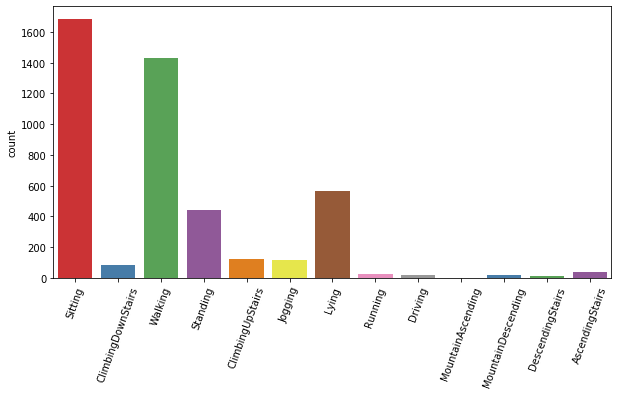

In [47]:
# Plot class distribution
#preprocessing = Preprocessing()
preprocessing.plot_target_distribution(y_segmented)

In [48]:
#Data Normalization using MinMaxScaler
X_train_scaled, X_test_scaled = preprocessing.min_max_scale(X_train, X_test)

In [49]:
print(X_train_scaled.shape, X_test_scaled.shape)

(3196, 272) (1370, 272)


In [50]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.0,3196.000000,3196.000000,3196.000000,...,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,0.028814,0.536610,0.557563,0.076598,0.565367,0.028814,0.0,0.006259,0.543841,0.523158,...,0.006121,0.213477,0.553703,0.781491,0.003972,0.597546,0.906994,0.004833,0.523774,0.004632
std,0.110091,0.221478,0.219248,0.151504,0.216938,0.110091,0.0,0.037755,0.065575,0.070057,...,0.037201,0.018992,0.025316,0.021465,0.023939,0.021961,0.024171,0.032643,0.019867,0.027879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000066,0.394366,0.419104,0.008148,0.429219,0.000066,0.0,0.000000,0.526154,0.505801,...,0.000023,0.213573,0.553753,0.781449,0.000126,0.598561,0.907457,0.000000,0.524169,0.000277
50%,0.000536,0.526761,0.543766,0.023162,0.555736,0.000536,0.0,0.000271,0.550769,0.531817,...,0.000205,0.213739,0.553753,0.781803,0.000260,0.598561,0.908178,0.000000,0.524169,0.001131
75%,0.004633,0.766197,0.768114,0.068067,0.781326,0.004633,0.0,0.005610,0.587692,0.566883,...,0.001378,0.213777,0.553753,0.782215,0.001130,0.598561,0.908804,0.000000,0.524169,0.003906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
  pd.DataFrame(y_train)[0].value_counts()

Sitting               1196
Walking                991
Lying                  393
Standing               306
ClimbingUpStairs        96
Jogging                 75
ClimbingDownStairs      55
AscendingStairs         26
Running                 18
MountainDescending      15
Driving                 12
DescendingStairs        11
MountainAscending        2
Name: 0, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2000) in class AscendingStairs will be larger than the number of samples in the majority class (class #Sitting -> 1196)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2000) in class ClimbingDownStairs will be larger than the number of samples in the majority class (class #Sitting -> 1196)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2000) in class ClimbingUpStairs will be larger than the number of samples in the majority class (class #Sitting -> 1196)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/anaconda3/lib/python3.7/site-packages/im

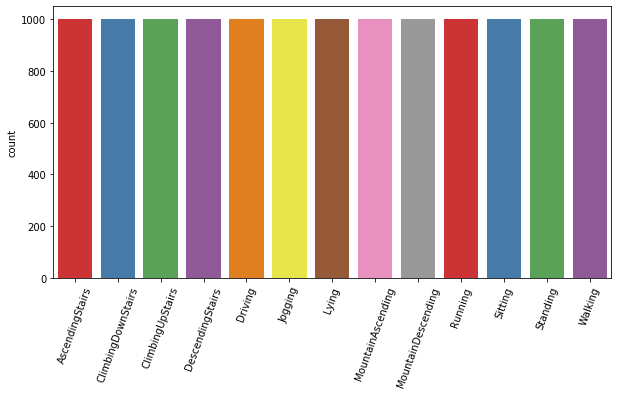

In [52]:
#Using imblearn to handle class imbalance
#SMOTE oversamples minority class and RandomUnderSampling undersamples majority class 
X_train_sampled, y_train_sampled = preprocessing.imbalance_handle(X_train_scaled, y_train)
preprocessing.plot_target_distribution(y_train_sampled)

In [53]:
pd.DataFrame(y_train_sampled)[0].value_counts()

DescendingStairs      1000
Running               1000
Sitting               1000
MountainAscending     1000
AscendingStairs       1000
Standing              1000
Walking               1000
Driving               1000
ClimbingDownStairs    1000
MountainDescending    1000
ClimbingUpStairs      1000
Lying                 1000
Jogging               1000
Name: 0, dtype: int64

In [54]:
print(X_train_sampled.shape, y_train_sampled.shape)

(13000, 272) (13000,)


## Modelling

### Logistic Regression

In [55]:
model = Models()

In [56]:
#Training with the scaled and sampled data 
log_reg_model1 = LogisticRegression(solver='saga', penalty='l2')
log_reg_model1.fit(X_train_sampled, y_train_sampled) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.91      0.98      0.94      1000
ClimbingDownStairs       0.93      0.93      0.93      1000
  ClimbingUpStairs       0.89      0.91      0.90      1000
  DescendingStairs       0.87      1.00      0.93      1000
           Driving       1.00      1.00      1.00      1000
           Jogging       0.99      0.99      0.99      1000
             Lying       0.97      0.97      0.97      1000
 MountainAscending       0.99      1.00      1.00      1000
MountainDescending       0.99      1.00      1.00      1000
           Running       1.00      1.00      1.00      1000
           Sitting       0.95      0.85      0.90      1000
          Standing       0.94      0.77      0.85      10

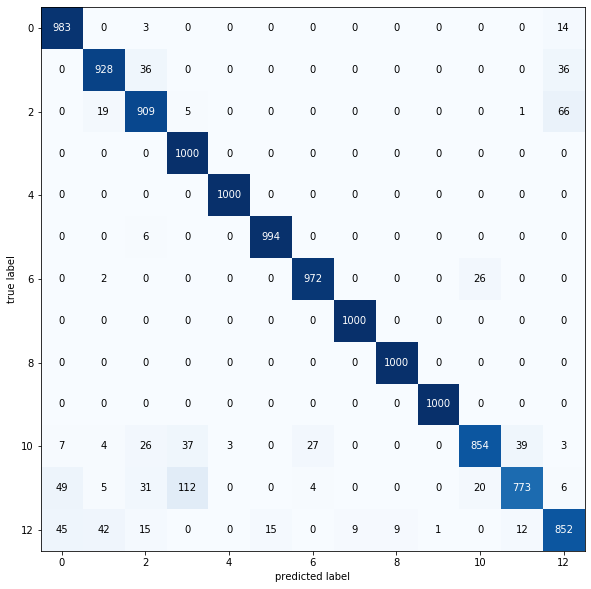


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.18      0.62      0.28        13
ClimbingDownStairs       0.39      0.72      0.51        29
  ClimbingUpStairs       0.41      0.66      0.51        29
  DescendingStairs       0.13      0.80      0.22         5
           Driving       0.62      0.71      0.67         7
           Jogging       0.93      0.95      0.94        40
             Lying       0.91      0.96      0.94       173
 MountainAscending       0.00      0.00      0.00         0
MountainDescending       0.18      0.50      0.27         4
           Running       0.80      1.00      0.89         8
           Sitting       0.99      0.85      0.91       486
          Standing       0.75      0.73      0.74       138
           Walking       0.96      0.85      0.90       438

          accuracy                           0.84      1370
         macro

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/plot_confusion_matr

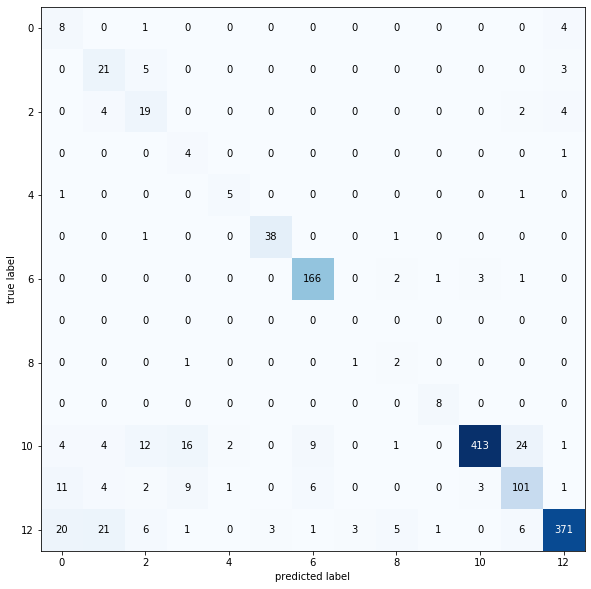

In [57]:
model.result(log_reg_model1, 'Log. Reg. 1', X_train_sampled, X_test_scaled,
             y_train_sampled, y_test)

In [58]:
#Training with the scaled data, without sampling
log_reg_model2 =  LogisticRegression(solver='saga', penalty='l2')
log_reg_model2.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.83      0.19      0.31        26
ClimbingDownStairs       0.78      0.51      0.62        55
  ClimbingUpStairs       0.68      0.52      0.59        96
  DescendingStairs       0.00      0.00      0.00        11
           Driving       1.00      0.33      0.50        12
           Jogging       0.94      0.79      0.86        75
             Lying       0.95      0.93      0.94       393
 MountainAscending       0.00      0.00      0.00         2
MountainDescending       0.83      0.33      0.48        15
           Running       1.00      0.78      0.88        18
           Sitting       0.90      0.94      0.92      1196
          Standing       0.74      0.75      0.74       3

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


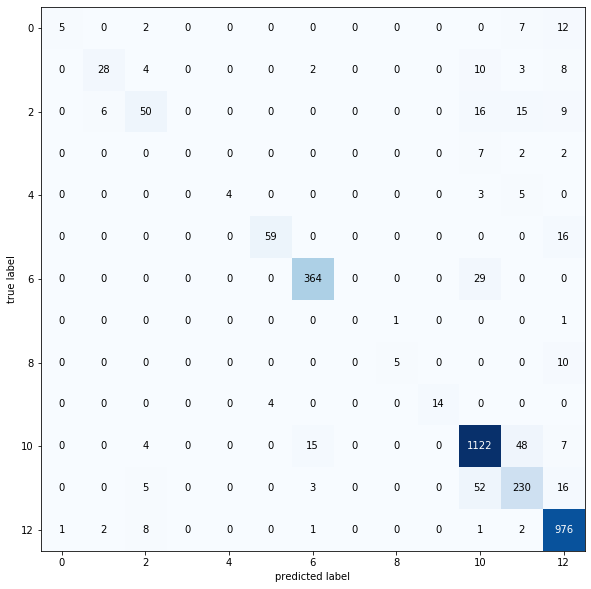


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.00      0.00      0.00        13
ClimbingDownStairs       0.67      0.28      0.39        29
  ClimbingUpStairs       0.62      0.45      0.52        29
  DescendingStairs       0.00      0.00      0.00         5
           Driving       1.00      0.29      0.44         7
           Jogging       1.00      0.80      0.89        40
             Lying       0.94      0.97      0.96       173
MountainDescending       1.00      0.50      0.67         4
           Running       0.88      0.88      0.88         8
           Sitting       0.90      0.95      0.92       486
          Standing       0.76      0.69      0.72       138
           Walking       0.90      0.98      0.94       438

          accuracy                           0.89      1370
         macro avg       0.72      0.56      0.61      1370
      weighted

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


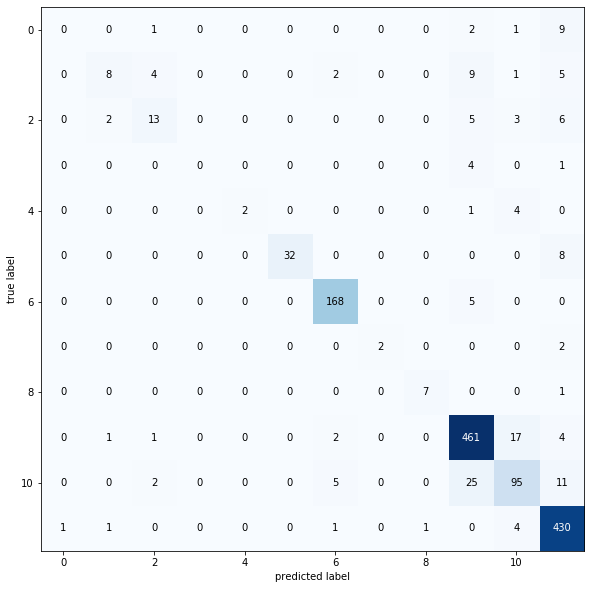

In [59]:
model.result(log_reg_model2, 'Log. Reg. 2', X_train_scaled, X_test_scaled, y_train, y_test)

In [60]:
#Training with the unprocessed data
log_reg_model3 = LogisticRegression(solver='saga', penalty='l2')
log_reg_model3.fit(X_train, y_train) #Scaled but Without the new feature


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

# model.result(log_reg_model3, 'Log. Reg. 3', X_train, X_test, y_train, y_test)

### Random Forest Classifier

In [61]:
#Scaled but Without the new feature, just the scaled and sampled data 
rf_model1 =  RandomForestClassifier()
rf_model1.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00      1000
ClimbingDownStairs       1.00      1.00      1.00      1000
  ClimbingUpStairs       1.00      1.00      1.00      1000
  DescendingStairs       1.00      1.00      1.00      1000
           Driving       1.00      1.00      1.00      1000
           Jogging       1.00      1.00      1.00      1000
             Lying       1.00      1.00      1.00      1000
 MountainAscending       1.00      1.00      1.00      1000
MountainDescending       1.00      1.00      1.00      1000
           Running       1.00      1.00      1.00      1000
           Sitting       1.00      1.00      1.00      1000
          Standing       1.00      1.00      1.00      10

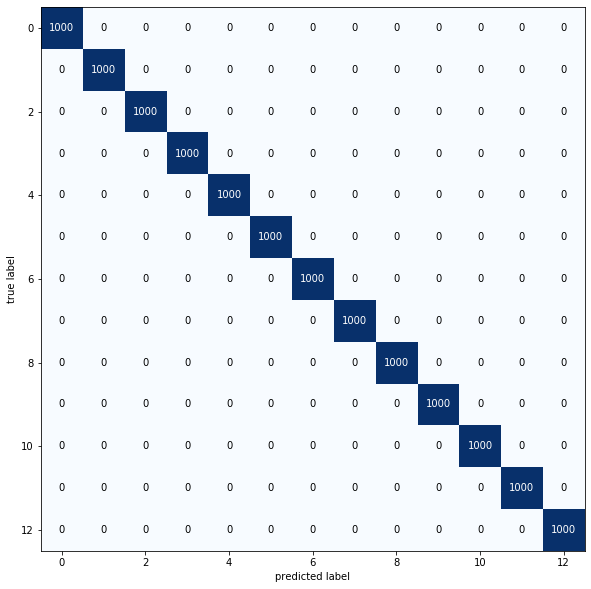


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      0.46      0.63        13
ClimbingDownStairs       0.96      0.83      0.89        29
  ClimbingUpStairs       0.85      0.79      0.82        29
  DescendingStairs       1.00      0.60      0.75         5
           Driving       0.75      0.43      0.55         7
           Jogging       0.95      1.00      0.98        40
             Lying       0.98      0.99      0.98       173
MountainDescending       1.00      0.75      0.86         4
           Running       1.00      1.00      1.00         8
           Sitting       0.99      0.94      0.96       486
          Standing       0.83      0.96      0.89       138
           Walking       0.95      0.99      0.97       438

          accuracy                           0.95      1370
         macro avg       0.94      0.81      0.86      1370
      weighted

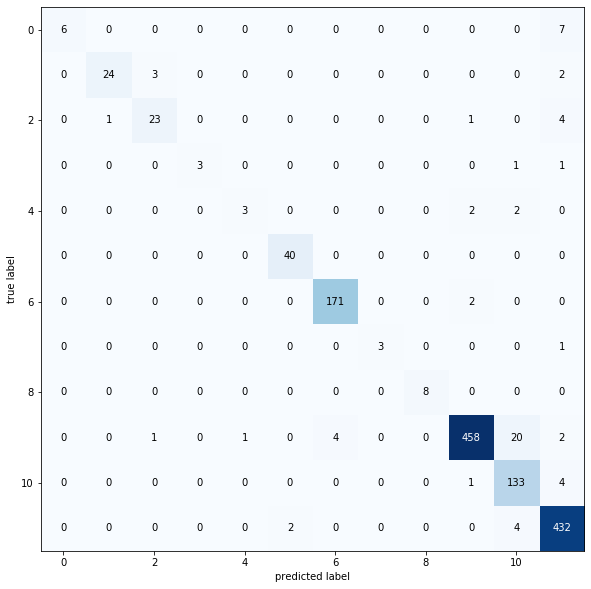

In [62]:
model.result(rf_model1, 'Random Forest 1', X_train_sampled, X_test_scaled, y_train_sampled, y_test)

In [63]:
#Training with the scaled data, without sampling
rf_model2 =  RandomForestClassifier()
rf_model2.fit(X_train_scaled, y_train)

RandomForestClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00        26
ClimbingDownStairs       1.00      1.00      1.00        55
  ClimbingUpStairs       1.00      1.00      1.00        96
  DescendingStairs       1.00      1.00      1.00        11
           Driving       1.00      1.00      1.00        12
           Jogging       1.00      1.00      1.00        75
             Lying       1.00      1.00      1.00       393
 MountainAscending       1.00      1.00      1.00         2
MountainDescending       1.00      1.00      1.00        15
           Running       1.00      1.00      1.00        18
           Sitting       1.00      1.00      1.00      1196
          Standing       1.00      1.00      1.00       3

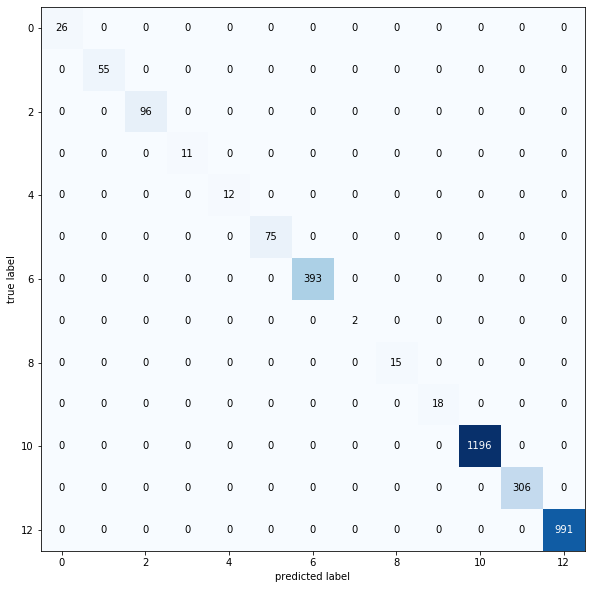


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      0.08      0.14        13
ClimbingDownStairs       0.95      0.69      0.80        29
  ClimbingUpStairs       0.95      0.72      0.82        29
  DescendingStairs       0.00      0.00      0.00         5
           Driving       1.00      0.29      0.44         7
           Jogging       0.97      0.95      0.96        40
             Lying       0.98      0.98      0.98       173
MountainDescending       1.00      0.50      0.67         4
           Running       1.00      1.00      1.00         8
           Sitting       0.98      0.97      0.98       486
          Standing       0.85      0.95      0.89       138
           Walking       0.94      0.99      0.96       438

          accuracy                           0.95      1370
         macro avg       0.88      0.68      0.72      1370
      weighted

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


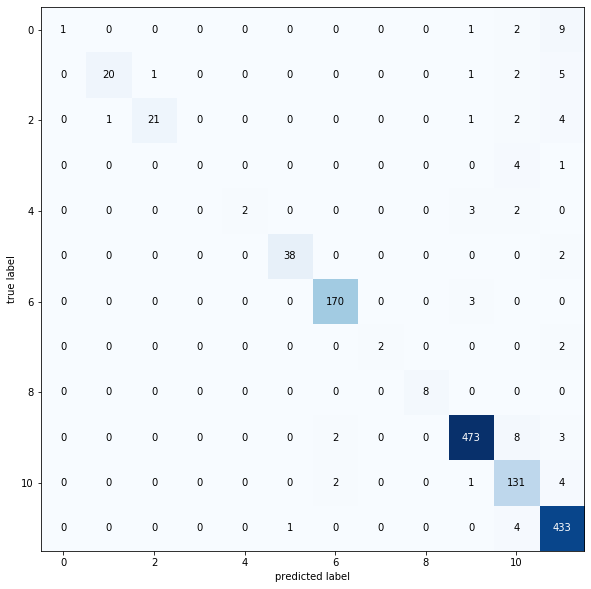

In [64]:
model.result(rf_model2, 'Random Forest 2', X_train_scaled, X_test_scaled, y_train, y_test)

In [65]:
rf_model3 =  RandomForestClassifier()
rf_model3.fit(X_train, y_train)

RandomForestClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00        26
ClimbingDownStairs       1.00      1.00      1.00        55
  ClimbingUpStairs       1.00      1.00      1.00        96
  DescendingStairs       1.00      1.00      1.00        11
           Driving       1.00      1.00      1.00        12
           Jogging       1.00      1.00      1.00        75
             Lying       1.00      1.00      1.00       393
 MountainAscending       1.00      1.00      1.00         2
MountainDescending       1.00      1.00      1.00        15
           Running       1.00      1.00      1.00        18
           Sitting       1.00      1.00      1.00      1196
          Standing       1.00      1.00      1.00       3

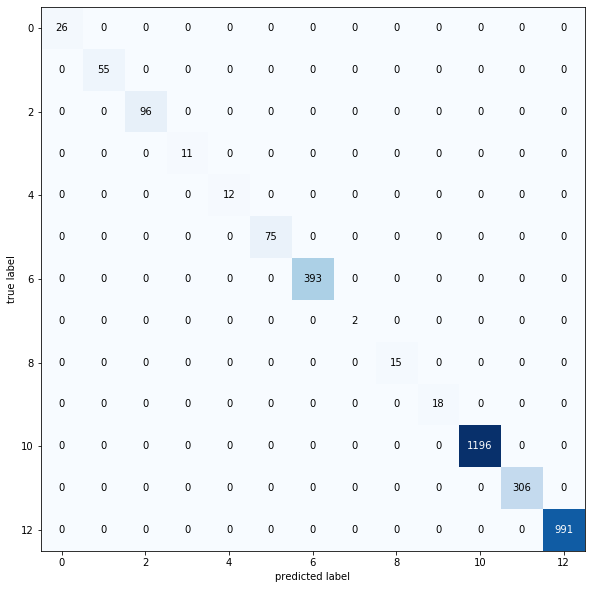


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      0.15      0.27        13
ClimbingDownStairs       1.00      0.62      0.77        29
  ClimbingUpStairs       0.89      0.86      0.88        29
  DescendingStairs       0.00      0.00      0.00         5
           Driving       1.00      0.43      0.60         7
           Jogging       0.95      0.97      0.96        40
             Lying       0.97      0.98      0.97       173
MountainDescending       1.00      0.25      0.40         4
           Running       1.00      0.88      0.93         8
           Sitting       0.98      0.97      0.97       486
          Standing       0.87      0.96      0.91       138
           Walking       0.94      0.99      0.96       438

          accuracy                           0.95      1370
         macro avg       0.88      0.67      0.72      1370
      weighted

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


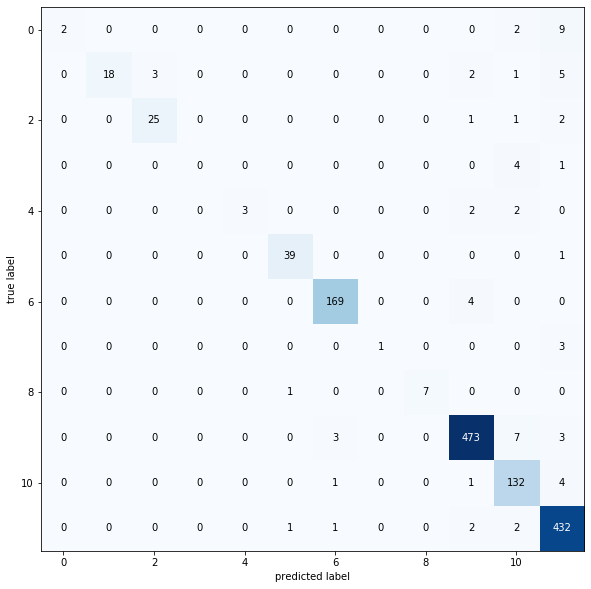

In [66]:
model.result(rf_model3, 'Random Forest 3', X_train, X_test, y_train, y_test)

## KNN Model

In [67]:
knn_model = KNeighborsClassifier()

### Evaluation of KNN using Leave_One_Out cross validation

In [68]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Using the sampled data
scores = cross_val_score(knn_model, X_train_sampled, y_train_sampled, cv=10)
print("Accuracy:",round(scores.mean()*100,2),"%")

Accuracy: 98.96 %


In [69]:
knn_model.fit(X_train_sampled, y_train_sampled)

KNeighborsClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00      1000
ClimbingDownStairs       0.99      1.00      0.99      1000
  ClimbingUpStairs       0.98      1.00      0.99      1000
  DescendingStairs       1.00      1.00      1.00      1000
           Driving       1.00      1.00      1.00      1000
           Jogging       0.99      1.00      1.00      1000
             Lying       1.00      1.00      1.00      1000
 MountainAscending       1.00      1.00      1.00      1000
MountainDescending       1.00      1.00      1.00      1000
           Running       1.00      1.00      1.00      1000
           Sitting       1.00      0.96      0.98      1000
          Standing       0.98      1.00      0.99      10

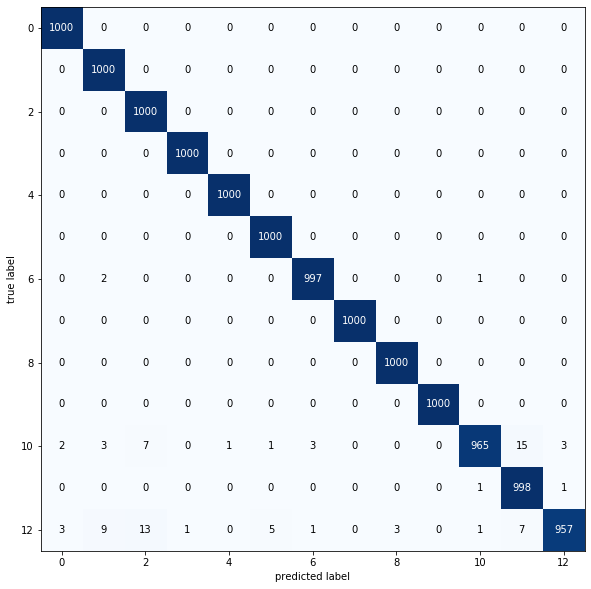


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.43      0.69      0.53        13
ClimbingDownStairs       0.68      0.79      0.73        29
  ClimbingUpStairs       0.77      0.79      0.78        29
  DescendingStairs       0.50      0.80      0.62         5
           Driving       0.67      0.57      0.62         7
           Jogging       0.89      0.97      0.93        40
             Lying       0.94      0.98      0.96       173
 MountainAscending       0.00      0.00      0.00         0
MountainDescending       0.60      0.75      0.67         4
           Running       1.00      1.00      1.00         8
           Sitting       0.99      0.93      0.96       486
          Standing       0.84      0.93      0.88       138
           Walking       0.97      0.92      0.95       438

          accuracy                           0.93      1370
         macro

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/plot_confusion_matr

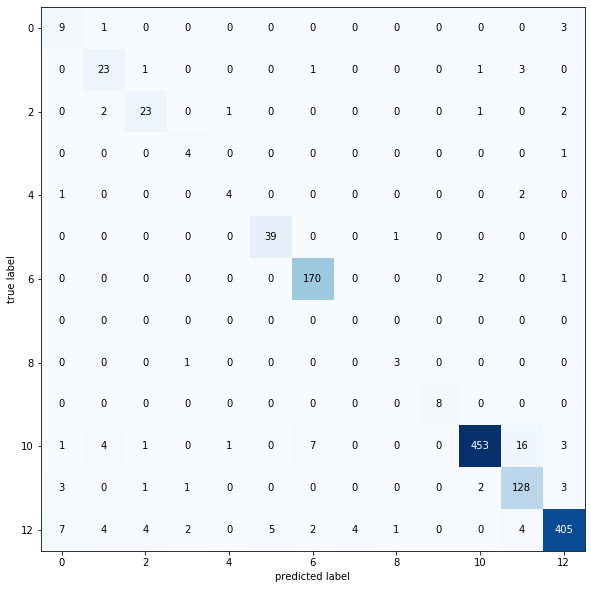

In [70]:
model.result(knn_model, 'KNN Model 1', X_train_sampled, X_test_scaled, y_train_sampled, y_test)

In [71]:
#Training with the scaled data, without sampling
knn_model2 =  KNeighborsClassifier()
knn_model2.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       1.00      0.58      0.73        26
ClimbingDownStairs       0.81      0.76      0.79        55
  ClimbingUpStairs       0.80      0.82      0.81        96
  DescendingStairs       1.00      0.55      0.71        11
           Driving       0.73      0.67      0.70        12
           Jogging       0.97      0.97      0.97        75
             Lying       0.96      0.98      0.97       393
 MountainAscending       0.00      0.00      0.00         2
MountainDescending       1.00      0.80      0.89        15
           Running       1.00      0.94      0.97        18
           Sitting       0.98      0.98      0.98      1196
          Standing       0.94      0.93      0.94       3

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


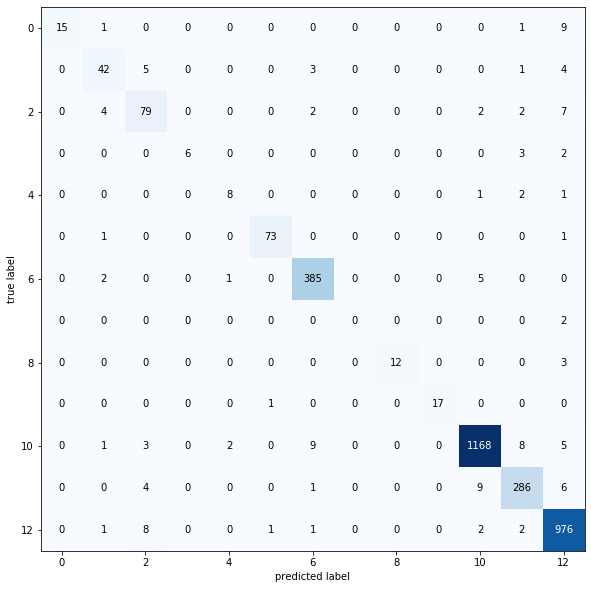


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.67      0.31      0.42        13
ClimbingDownStairs       0.65      0.59      0.62        29
  ClimbingUpStairs       0.70      0.66      0.68        29
  DescendingStairs       0.75      0.60      0.67         5
           Driving       0.67      0.29      0.40         7
           Jogging       1.00      0.97      0.99        40
             Lying       0.93      0.97      0.95       173
MountainDescending       1.00      0.50      0.67         4
           Running       1.00      1.00      1.00         8
           Sitting       0.96      0.95      0.96       486
          Standing       0.86      0.86      0.86       138
           Walking       0.94      0.99      0.96       438

          accuracy                           0.93      1370
         macro avg       0.84      0.72      0.76      1370
      weighted

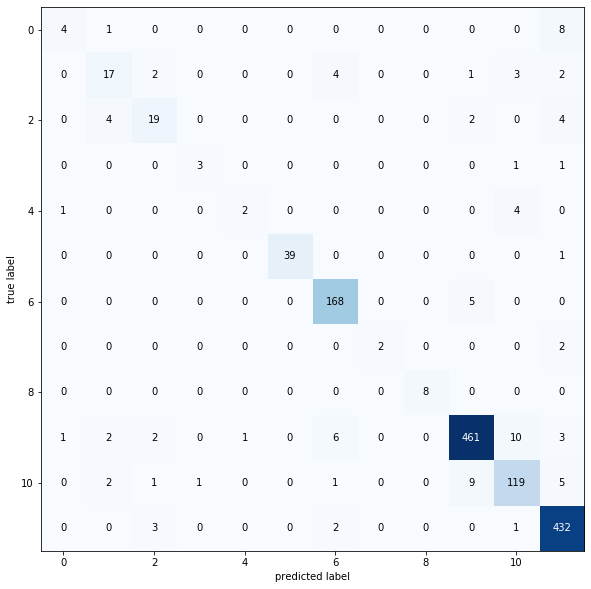

In [72]:
model.result(knn_model2, 'KNN Model 2', X_train_scaled, X_test_scaled, y_train, y_test)

In [73]:
#Using unsampled and unscaled data
knn_model3 =  KNeighborsClassifier()
knn_model3.fit(X_train, y_train)

KNeighborsClassifier()

Press 1 to save Model object and parameters to result_dict, any other key to cancel.
Previous save with same model name is overwritten: 1

--------------------------------Train Set-----------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.44      0.15      0.23        26
ClimbingDownStairs       0.42      0.45      0.43        55
  ClimbingUpStairs       0.61      0.65      0.63        96
  DescendingStairs       0.33      0.36      0.35        11
           Driving       0.62      0.42      0.50        12
           Jogging       0.80      0.87      0.83        75
             Lying       0.86      0.81      0.83       393
 MountainAscending       0.00      0.00      0.00         2
MountainDescending       0.56      0.33      0.42        15
           Running       0.89      0.89      0.89        18
           Sitting       0.91      0.92      0.92      1196
          Standing       0.80      0.72      0.76       3

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


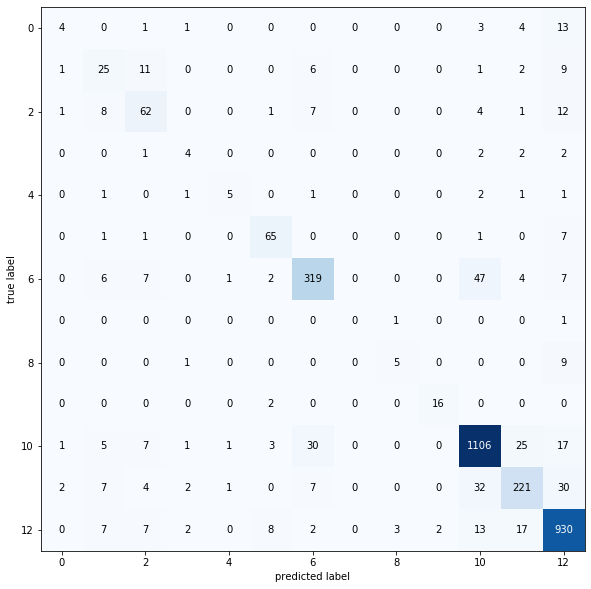


--------------------------------Test Set------------------------------------------
                    precision    recall  f1-score   support

   AscendingStairs       0.00      0.00      0.00        13
ClimbingDownStairs       0.24      0.21      0.22        29
  ClimbingUpStairs       0.16      0.24      0.19        29
  DescendingStairs       0.00      0.00      0.00         5
           Driving       0.33      0.14      0.20         7
           Jogging       0.76      0.93      0.83        40
             Lying       0.76      0.72      0.74       173
MountainDescending       0.00      0.00      0.00         4
           Running       0.86      0.75      0.80         8
           Sitting       0.86      0.87      0.86       486
          Standing       0.65      0.51      0.57       138
           Walking       0.85      0.91      0.88       438

          accuracy                           0.78      1370
         macro avg       0.45      0.44      0.44      1370
      weighted

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


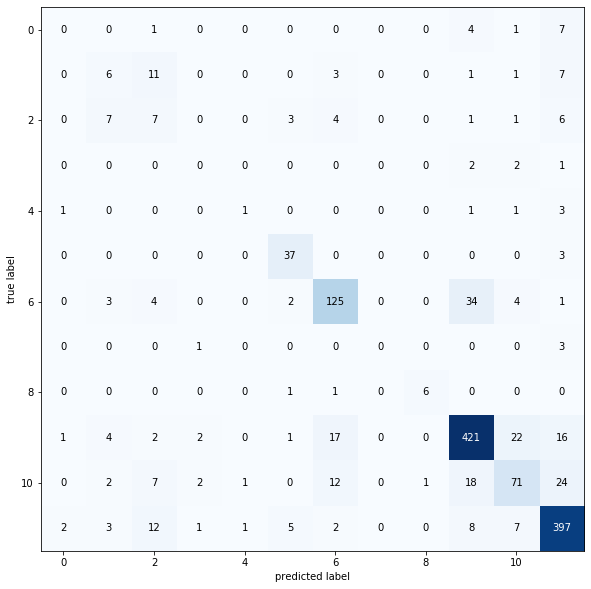

In [74]:
model.result(knn_model3, 'KNN Model 3', X_train, X_test, y_train, y_test)

In [45]:
#DataFrame Summary of models
pd.DataFrame(model.result_dict['Accuracy Score'])

,Log. Reg. 1,Log. Reg. 2,Log. Reg. 3,Random Forest 1,Random Forest 2,Random Forest 3,KNN Model 1,KNN Model 2,KNN Model 3
Train,0.949846,0.893930,0.310701,1.000000,1.000000,1.000000,0.993923,0.959637,0.864205
Test,0.843796,0.889051,0.319708,0.943796,0.951095,0.947445,0.921168,0.929927,0.781752


In [46]:
model.result_dict.keys()

dict_keys(['Accuracy Score', 'Model Objects', 'Parameters', 'Predictions', 'Datasets'])

In [47]:
pickle.dump(model.result_dict, open('result.p', 'wb'))

In [48]:
#Uncomment to read result.p into model.result_dict
#model.result_dict = pickle.load(open('result.p', 'rb'))

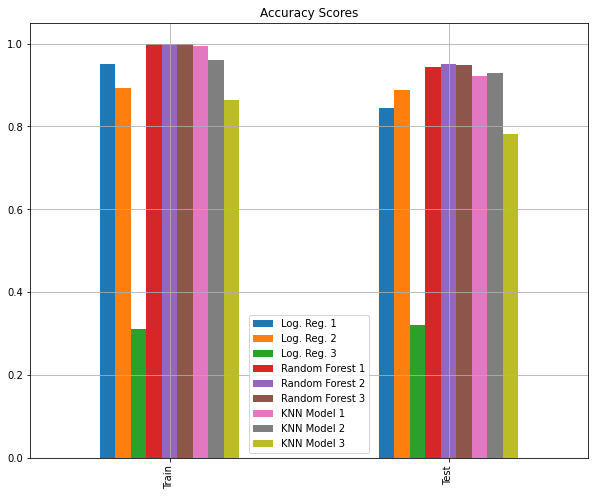

In [49]:
model.plot_evaluations()
#1: Model trained with scaled and sampled data
#2: Model trained with the scaled data, without sampling
#3: Model trained with unscaled and unsampled data